## Cell Classification project

#### Import packages

In [3]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

#### Path

In [4]:
Main_Train_Path = Path(r"cell_images\train")
Main_Test_Path = Path(r"cell_images\test")
os.listdir(Main_Train_Path)

['parasitized', 'uninfected']

In [5]:
Train_PNG_Path = list(Main_Train_Path.glob(r"*/*.png"))
Test_PNG_Path = list(Main_Test_Path.glob(r"*/*.png"))
print(Train_PNG_Path[0:5])

[WindowsPath('cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'), WindowsPath('cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'), WindowsPath('cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'), WindowsPath('cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'), WindowsPath('cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')]


#### Label

In [6]:
Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_PNG_Path))
print("Train Parasitized: ",Train_PNG_Labels.count("parasitized"))
print("Train Uninfected: ",Train_PNG_Labels.count("uninfected"))

Train Parasitized:  12479
Train Uninfected:  12479


In [7]:
Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_PNG_Path))
print("Test Parasitized: ",Test_PNG_Labels.count("parasitized"))
print("Test Uninfected: ",Test_PNG_Labels.count("uninfected"))

Test Parasitized:  1300
Test Uninfected:  1300


In [17]:
def convertPngToNpy(imgPath):
    return np.array(imread(imgPath))

In [19]:
PNG_Series = pd.Series(Train_PNG_Path,name="PNG").astype(str)
Category_Series = pd.Series(Train_PNG_Labels,name="CATEGORY")
NPY_Series = PNG_Series.apply(lambda x: convertPngToNpy(x))
NPY_Series.name = "NPY"

In [21]:
Main_Train_df = pd.concat([PNG_Series,Category_Series,NPY_Series],axis=1)
print(Main_Train_df.head(-1))

                                                     PNG     CATEGORY  \
0      cell_images\train\parasitized\C100P61ThinF_IMG...  parasitized   
1      cell_images\train\parasitized\C100P61ThinF_IMG...  parasitized   
2      cell_images\train\parasitized\C100P61ThinF_IMG...  parasitized   
3      cell_images\train\parasitized\C100P61ThinF_IMG...  parasitized   
4      cell_images\train\parasitized\C100P61ThinF_IMG...  parasitized   
...                                                  ...          ...   
24952  cell_images\train\uninfected\C99P60ThinF_IMG_2...   uninfected   
24953  cell_images\train\uninfected\C99P60ThinF_IMG_2...   uninfected   
24954  cell_images\train\uninfected\C99P60ThinF_IMG_2...   uninfected   
24955  cell_images\train\uninfected\C99P60ThinF_IMG_2...   uninfected   
24956  cell_images\train\uninfected\C99P60ThinF_IMG_2...   uninfected   

                                                     NPY  
0      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1    

In [22]:
shuffled_Main_Train_df = Main_Train_df.sample(frac=1).reset_index(drop=True)
print(shuffled_Main_Train_df.head(-1))

                                                     PNG     CATEGORY  \
0      cell_images\train\parasitized\C105P66ThinF_IMG...  parasitized   
1      cell_images\train\uninfected\C54P15thinF_IMG_2...   uninfected   
2      cell_images\train\uninfected\C175P136NThinF_IM...   uninfected   
3      cell_images\train\parasitized\C91P52ThinF_IMG_...  parasitized   
4      cell_images\train\uninfected\C156P117ThinF_IMG...   uninfected   
...                                                  ...          ...   
24952  cell_images\train\parasitized\C177P138NThinF_I...  parasitized   
24953  cell_images\train\parasitized\C59P20thinF_IMG_...  parasitized   
24954  cell_images\train\uninfected\C122P83ThinF_IMG_...   uninfected   
24955  cell_images\train\parasitized\C132P93ThinF_IMG...  parasitized   
24956  cell_images\train\uninfected\C139P100ThinF_IMG...   uninfected   

                                                     NPY  
0      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1    

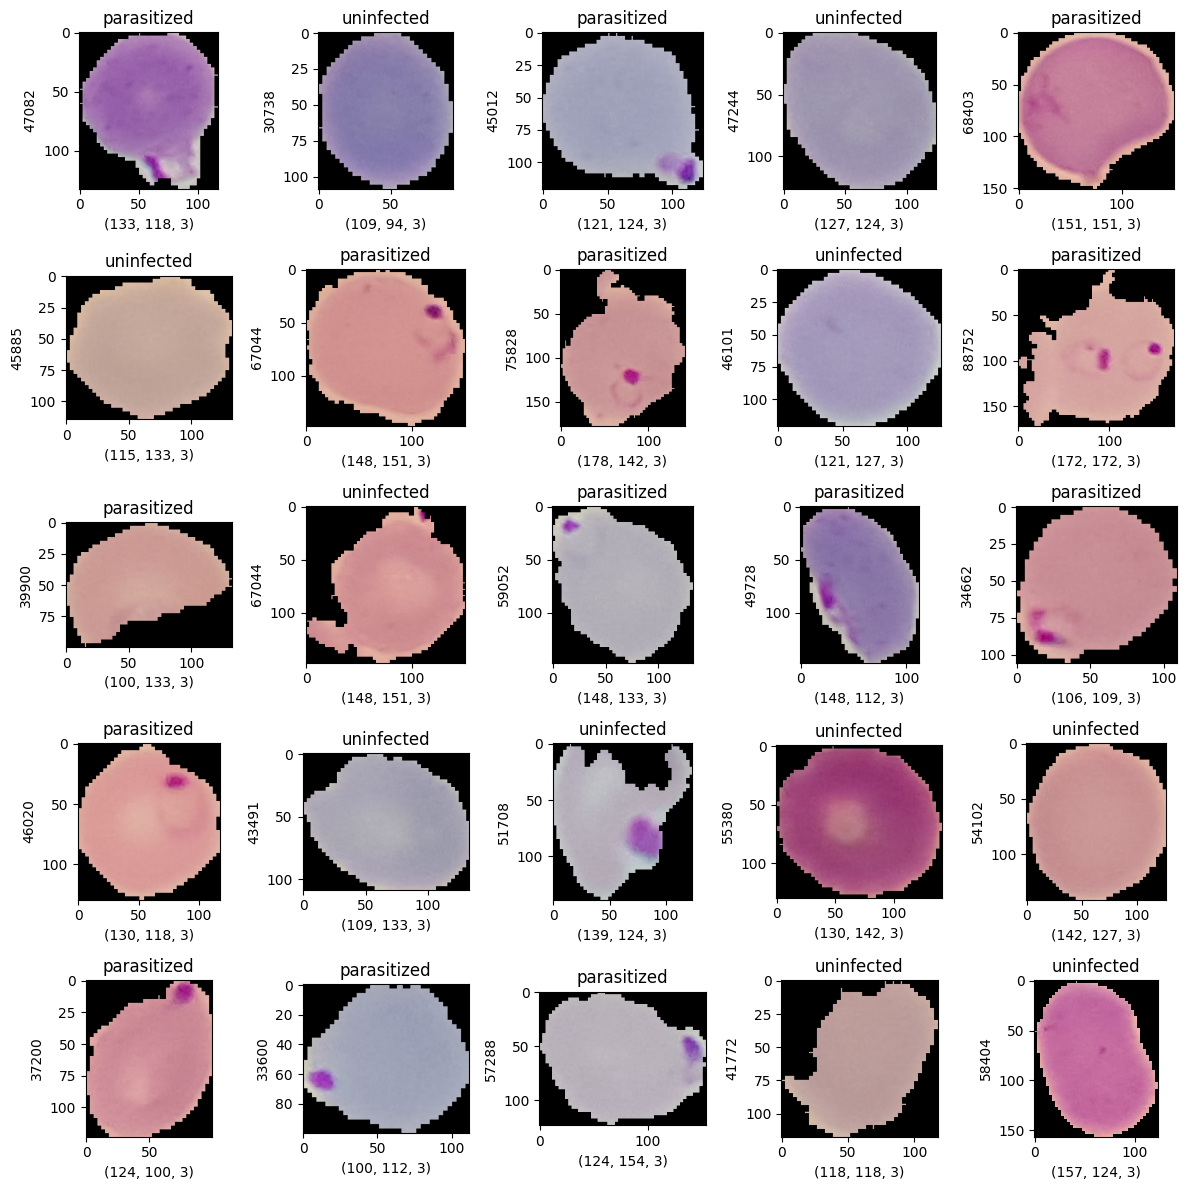

In [10]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG = imread(shuffled_Main_Train_df["PNG"][i])
    ax.set_xlabel(IMG.shape)
    ax.set_ylabel(IMG.size)
    ax.set_title(shuffled_Main_Train_df["CATEGORY"][i])
    ax.imshow(IMG,cmap="Greys_r")
plt.tight_layout()
plt.show()

In [12]:
#using Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network described above.
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [          
        tf.keras.Input(shape=(400,)),    #specify input size     
        Dense(25, activation="relu", name="L1"),
        Dense(15, activation="relu", name="L2"),
        Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)

model.summary()
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [23]:
#Define loss function and optimizer used
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    shuffled_Main_Train_df["NPY"],shuffled_Main_Train_df["CATEGORY"],
    epochs=40
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).